In [5]:
import numpy as np
import pandas as pd

In [6]:
data_pm = pd.read_csv("./best_20com_9pm_inuse.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_budget_list=["./budget"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_budget_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
# df.to_csv("./Lamarck_budget.csv",header=True,index=True)

[590, 579, 588, 589, 569, 558, 542, 562]
Int64Index([590, 579, 588, 589, 569, 558, 542, 562], dtype='int64')
             590  579  588  589  569  558  542  562
F1  Times1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...          ...  ...  ...  ...  ...  ...  ...  ...
F13 Times6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
    Times10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[130 rows x 8 columns]


In [7]:
data_pm = pd.read_csv("./best_20com_9pm_inuse.csv", header=0, index_col=[0])
index = data_pm.index.tolist()
print(index)
def read_csv(path):
    return pd.read_csv(path,index_col=[0,1],header=0)
path_percent_list=["./combination"+str(i)+".csv" for i in index]
df = [read_csv(name) for name in path_percent_list]
df = pd.concat(df,axis=1)
df.columns = index
print(df.columns)
print(df)
df.to_csv("./Lamarck_rawdata.csv",header=True,index=True)

def percent(Function, optimal):
    dataframe = df.loc[(Function, slice(None)), :]
    dataframe = pd.DataFrame(data=dataframe.values,
                             columns=dataframe.columns)
    percent_dataframe = dataframe.applymap(lambda x: True if ((x-optimal)<=threshold or x<=optimal) else False)
    percent_dataframe["Function"] = Function
    return percent_dataframe

threshold =0.0001
opt = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -418.98 * 400, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0003, -1.0316, 0.398, 3.0,
       -3.86, -3.32, -10.1532,-10.4028, -10.5363]
function_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]
percent_df = [percent(Function="F" + str(i), optimal=opt[i - 1]) for i in function_list]
percent_df = pd.concat(percent_df, axis=0)
percent_df = percent_df.groupby(["Function"]).sum().applymap(lambda x: str(x * 5) + "%")
index = ["F" + str(i) for i in function_list]
percent_df = percent_df.loc[index]
display(percent_df)
# percent_df.to_csv("./Lamarck_percent.csv")

[590, 579, 588, 589, 569, 558, 542, 562]
Int64Index([590, 579, 588, 589, 569, 558, 542, 562], dtype='int64')
                    590        579         588         589         569  \
F1  Times1   231.306633  90.438568  257.062222  265.643423   97.589265   
    Times2   235.569180  92.345372  241.812219  263.931203   90.782862   
    Times3   258.844882  96.327977  246.252145  273.693376   98.049806   
    Times4   237.883136  94.586219  256.411147  275.376886   81.177433   
    Times5   256.121091  94.642054  254.311794  239.854703  100.740666   
...                 ...        ...         ...         ...         ...   
F13 Times6    18.831257   5.986710   19.324499   17.739523    8.319420   
    Times7    17.815280   6.601005   19.965696   18.729478    7.112449   
    Times8    19.375599   6.492381   19.988125   20.854435    8.202071   
    Times9    18.736001   5.963805   16.903289   19.725309    7.835036   
    Times10   23.717955   6.221873   18.110373   19.931951    7.482784   

  

,590,579,588,589,569,558,542,562
Function,,,,,,,,
F1,0%,0%,0%,0%,0%,0%,0%,0%
F2,0%,0%,0%,0%,0%,0%,0%,0%
F3,0%,0%,0%,0%,0%,0%,0%,0%
F4,0%,0%,0%,0%,0%,0%,0%,0%
F5,0%,0%,0%,0%,0%,0%,0%,0%
F6,0%,0%,0%,0%,0%,0%,0%,0%
F7,0%,0%,0%,0%,0%,0%,50%,0%
F8,0%,0%,0%,0%,0%,0%,0%,0%
F9,0%,0%,0%,0%,0%,0%,0%,0%


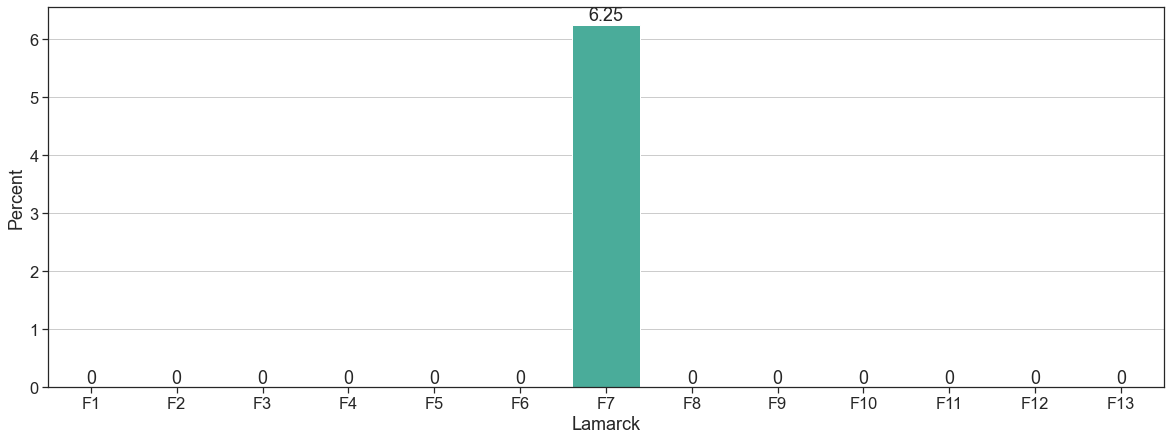

In [8]:
from matplotlib import pyplot as plt
dataframe = percent_df.copy()
dataframe = dataframe.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
# display(dataframe)
import seaborn as sns
dataframe = dataframe.stack()
# display(dataframe)
dataframe = dataframe.rename_axis(index=["Function","Combinations"])
dataframe = dataframe.reset_index(level=[0, 1], name="Percent")
dataframe["Percent"] = pd.to_numeric(dataframe["Percent"])
dataframe = dataframe.reset_index(drop=False)
# display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
def show_graph(dataframe):
    sns.set_theme(style="whitegrid", palette="pastel",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    plt.figure(figsize=(20,7))
    plt.subplot(1,1,1)
    ax=sns.barplot(data=dataframe,y="Percent",x="Function",errorbar=None)
    ax.bar_label(ax.containers[0],label_type='edge')
    plt.xlabel("Lamarck")
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
    # plt.savefig("./Lamarck_percent.png", dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)